
# Created By Arthkumar Patel


In [1]:
# Import necessory modules for the code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tt

In [2]:
# Load all 3 files and dropping columns from 2020-01-22 to 2020-01-26 as there are zero cases and deaths due to COVID. 
# By this way week can start from Monday and end on Sunday.
cases_load=pd.read_csv('/Users/whitney/Courses/649/Spring21/assignments/assignment1/covid_confirmed_usafacts.csv').drop(['2020-01-22','2020-01-23','2020-01-24','2020-01-25','2020-01-26'],axis=1)
deaths_load=pd.read_csv('/Users/whitney/Courses/649/Spring21/assignments/assignment1/covid_deaths_usafacts.csv').drop(['2020-01-22','2020-01-23','2020-01-24','2020-01-25','2020-01-26'],axis=1)
county=pd.read_csv('/Users/whitney/Courses/649/Spring21/assignments/assignment1/covid_county_population_usafacts.csv')
cases=cases_load.drop(['countyFIPS','StateFIPS'],axis=1)
deaths=deaths_load.drop(['countyFIPS','StateFIPS'],axis=1)
cases2=cases_load.drop(['StateFIPS','State','County Name'],axis=1)       
deaths2=deaths_load.drop(['StateFIPS','State','County Name'],axis=1)

In [3]:
# Select 4 states mentioned in question : California, Oregon, Washington, Nevada and grouped all county data by state and perform summation and transpose dataframe so it can be more useful.
cases_new=cases.loc[cases['State'].isin(['CA','OR','WA','NV'])].groupby(['State']).sum().T
deaths_new=deaths.loc[deaths['State'].isin(['CA','OR','WA','NV'])].groupby(['State']).sum().T

In [4]:
# To generate weekly data convert index values to datetime. Then, from date values, segregate Year and WeekNo.
# So the final index would be (Year, WeekNo) Pairs. For Example (2020,10) means 10th week of 2020 which have dates 2nd March to 8th March, 2020.
cases_new.index=pd.to_datetime(cases_new.index)
cases_new['Year'] = cases_new.index.year
cases_new['WeekNo']=cases_new.index.week
deaths_new.index=pd.to_datetime(deaths_new.index)
deaths_new['Year'] = deaths_new.index.year
deaths_new['WeekNo']=deaths_new.index.week

/Users/whitney/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """
/Users/whitney/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [5]:
# As data shows total cases so need to subtract data from adjacent rows to generate new cases. 
# Then, group data by Year and WeekNo & perform summation for each group.
cases_new['California']=cases_new['CA']-cases_new['CA'].shift(1).fillna(0)
cases_new['Nevada']=cases_new['NV']-cases_new['NV'].shift(1).fillna(0)
cases_new['Orlando']=cases_new['OR']-cases_new['OR'].shift(1).fillna(0)
cases_new['Washington']=cases_new['WA']-cases_new['WA'].shift(1).fillna(0)
cases_new=cases_new.drop(['CA','NV','OR','WA'],axis=1)
cases_plot=cases_new.groupby([cases_new['Year'],cases_new['WeekNo']]).sum()
cases_plot

State        California   Nevada  Orlando  Washington
Year WeekNo                                          
2020 5              4.0      0.0      0.0         1.0
     6              2.0      0.0      0.0         0.0
     7              2.0      0.0      0.0         0.0
     8              4.0      0.0      0.0         0.0
     9             10.0      0.0      1.0        10.0
     10           109.0      4.0     13.0       111.0
     11           490.0     22.0     25.0       647.0
     12          1484.0    168.0    122.0      1227.0
     13          4602.0    732.0    387.0      2900.0
     14          8649.0    910.0    519.0      3121.0
     15          8077.0    788.0    460.0      2393.0
     16          8158.0   1103.0    382.0      1479.0
     17         12082.0    915.0    402.0      1631.0
     18         11274.0    848.0    369.0      1661.0
     19         13048.0    645.0    544.0      1709.0
     20         12180.0    768.0    394.0      1541.0
     21         14274.0    996.0    304.0      1396.0
     22         18254.0    713.0    321.0      1867.0
     23         18645.0   1035.0    561.0      2034.0
     24         21621.0   1547.0    831.0      2104.0
     25         24722.0   2007.0   1302.0      2841.0
     26         36816.0   3959.0   1404.0      3077.0
     27         41761.0   5258.0   1889.0      4147.0
     28         68176.0   5265.0   1940.0      4758.0
     29         60534.0   8082.0   2409.0      6290.0
     30         65884.0   7068.0   2179.0      5689.0
     31         61663.0   7372.0   2347.0      5537.0
     32         47741.0   6025.0   2157.0      4896.0
     33         63836.0   5075.0   1996.0      4391.0
     34         43971.0   4296.0   1691.0      3553.0
     35         36141.0   3307.0   1603.0      3307.0
     36         33436.0   2659.0   1490.0      2914.0
     37         22840.0   1970.0   1295.0      2593.0
     38         25011.0   2237.0   1464.0      2722.0
     39         23948.0   2909.0   2019.0      3721.0
     40         22180.0   3344.0   1950.0      3604.0
     41         22749.0   3650.0   2485.0      3153.0
     42         20417.0   4650.0   2277.0      5174.0
     43         30949.0   5282.0   2569.0      4714.0
     44         29026.0   5092.0   3328.0      5399.0
     45         38973.0   9069.0   5019.0      9019.0
     46         56369.0  10088.0   6432.0     12708.0
     47         78569.0  11026.0   8290.0     11221.0
     48         98822.0  17924.0   8949.0     21440.0
     49        142436.0  17205.0  10376.0     14747.0
     50        218943.0  17781.0   6925.0     24612.0
     51        294428.0  14305.0   8887.0     20541.0
     52        259513.0  14139.0   6514.0      7589.0
     53        122568.0   8274.0   7088.0     16563.0
2021 1         279701.0  16743.0   8939.0      8749.0
     2         271512.0  12797.0   8411.0     19780.0
     3         166676.0   9197.0   5581.0     16421.0
     4         134177.0   7338.0   4891.0     11399.0
     5          92578.0   5681.0   4409.0      8549.0
     53        145891.0   6747.0      0.0      8496.0

## **Question 1: Plot the weekly number of new cases of covid in the following states: California, Oregon,Washington, and Nevada. A week starts on Monday and ends on Sunday.**

## Answer 1: Here is the weekly plotting of New Cases of Covid in the 4 states.

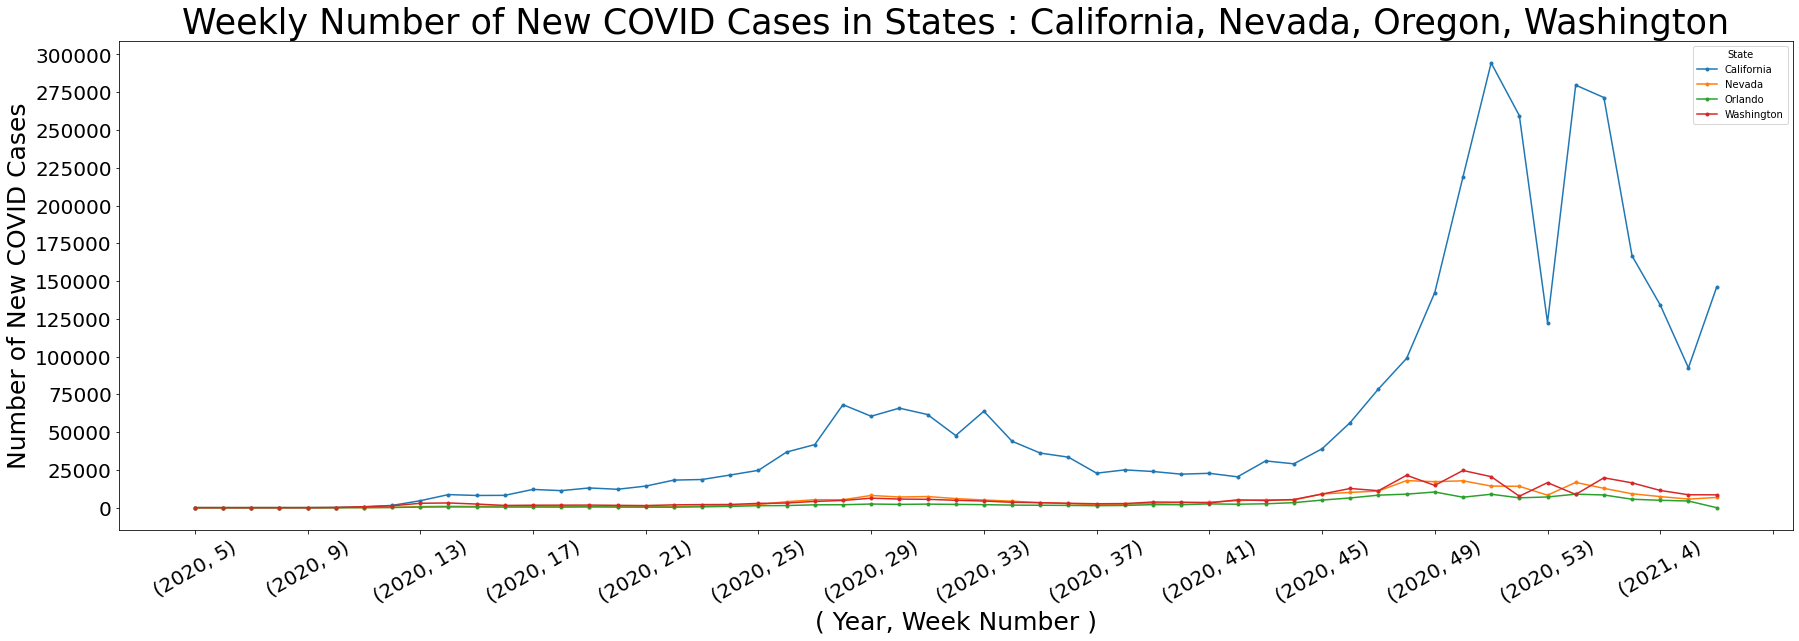

In [6]:
# Plotting of New Weekly Cases of Covid in 4 States
plt.rcParams["figure.figsize"] = (30,9)
ax=cases_plot.plot(marker='.',fontsize=20,xticks=np.arange(0,58,4),rot=30)
ax.set_xlabel('( Year, Week Number )',fontsize=25)
ax.set_ylabel('Number of New COVID Cases',fontsize=25)
ax.set_title('Weekly Number of New COVID Cases in States : California, Nevada, Oregon, Washington',fontsize=35)
ax.yaxis.set_major_locator(tt.MultipleLocator(25000))

## **Question 2: Do those states follow the the same trends?**

### Answer 2: From above plot, 

### * We can say that Nevada, Oregon and Washington follows almost same trend, while California has much higher weekly new cases as 2020 ends compared to other three states.
### * Also, for Washington, Nevada and Oregon the maximum number of weekly new cases reach to around 25,000 while California, the maximum number of weekly new cases is almost 290,000 which is almost 11 times higher than other 3 states.

In [7]:
# As data shows total deaths so need to subtract data from adjacent rows to generate weekly deaths. Then, group data by Year and WeekNo & perform summation for each group.
deaths_new['California']=deaths_new['CA']-deaths_new['CA'].shift(1).fillna(0)
deaths_new['Nevada']=deaths_new['NV']-deaths_new['NV'].shift(1).fillna(0)
deaths_new['Orlando']=deaths_new['OR']-deaths_new['OR'].shift(1).fillna(0)
deaths_new['Washington']=deaths_new['WA']-deaths_new['WA'].shift(1).fillna(0)
deaths_new=deaths_new.drop(['CA','NV','OR','WA'],axis=1)
deaths_plot=deaths_new.groupby([deaths_new['Year'],deaths_new['WeekNo']]).sum()
deaths_plot

State        California  Nevada  Orlando  Washington
Year WeekNo                                         
2020 5              0.0     0.0      0.0         0.0
     6              1.0     0.0      0.0         0.0
     7              0.0     0.0      0.0         0.0
     8              1.0     0.0      0.0         0.0
     9              0.0     0.0      0.0         1.0
     10             2.0     0.0      0.0        18.0
     11             5.0     0.0      1.0        23.0
     12            27.0     2.0      3.0        52.0
     13            99.0    13.0      9.0       101.0
     14           217.0    31.0     14.0       143.0
     15           325.0    56.0     25.0       170.0
     16           500.0    72.0     22.0       126.0
     17           536.0    48.0     17.0       115.0
     18           495.0    51.0     18.0        84.0
     19           508.0    49.0     18.0        97.0
     20           524.0    43.0     10.0        70.0
     21           511.0    43.0     11.0        61.0
     22           420.0    21.0      5.0        57.0
     23           461.0    25.0     11.0        41.0
     24           450.0     9.0     12.0        57.0
     25           425.0    24.0     14.0        52.0
     26           423.0    13.0     13.0        42.0
     27           406.0    34.0     12.0        49.0
     28           713.0    59.0     19.0        78.0
     29           664.0    54.0     26.0        10.0
     30           737.0    87.0     29.0        54.0
     31           943.0    98.0     37.0        92.0
     32           980.0   125.0     30.0        94.0
     33           865.0   115.0     29.0        89.0
     34           914.0   125.0     32.0        84.0
     35           786.0   105.0     30.0        41.0
     36           790.0    87.0     28.0        49.0
     37           684.0    60.0     34.0        41.0
     38           606.0    82.0     13.0        45.0
     39           585.0    54.0     24.0        59.0
     40           563.0    38.0     18.0        47.0
     41           426.0    38.0     35.0        47.0
     42           399.0    50.0     18.0        50.0
     43           365.0    37.0     36.0        57.0
     44           307.0    29.0     38.0        68.0
     45           311.0    72.0     39.0        70.0
     46           289.0    57.0     31.0        77.0
     47           456.0   101.0     59.0        99.0
     48           433.0   122.0     85.0        82.0
     49           781.0   167.0    128.0       137.0
     50          1095.0   217.0    104.0        47.0
     51          1640.0   205.0    165.0       224.0
     52          1552.0   192.0    113.0        28.0
     53          1166.0   169.0     62.0       -32.0
2021 1           3163.0   262.0     98.0       190.0
     2           3691.0   302.0    183.0       210.0
     3           3398.0   238.0    107.0       272.0
     4           3907.0   238.0     73.0       171.0
     5           3245.0   248.0     64.0       164.0
     53          1152.0    54.0      0.0       346.0

## **Question 3: Plot the weekly number of covid deaths in the following states: California, Oregon, Washington, and Nevada.**

## Answer 3: Here is the weekly plotting of Deaths due to Covid in the 4 states.

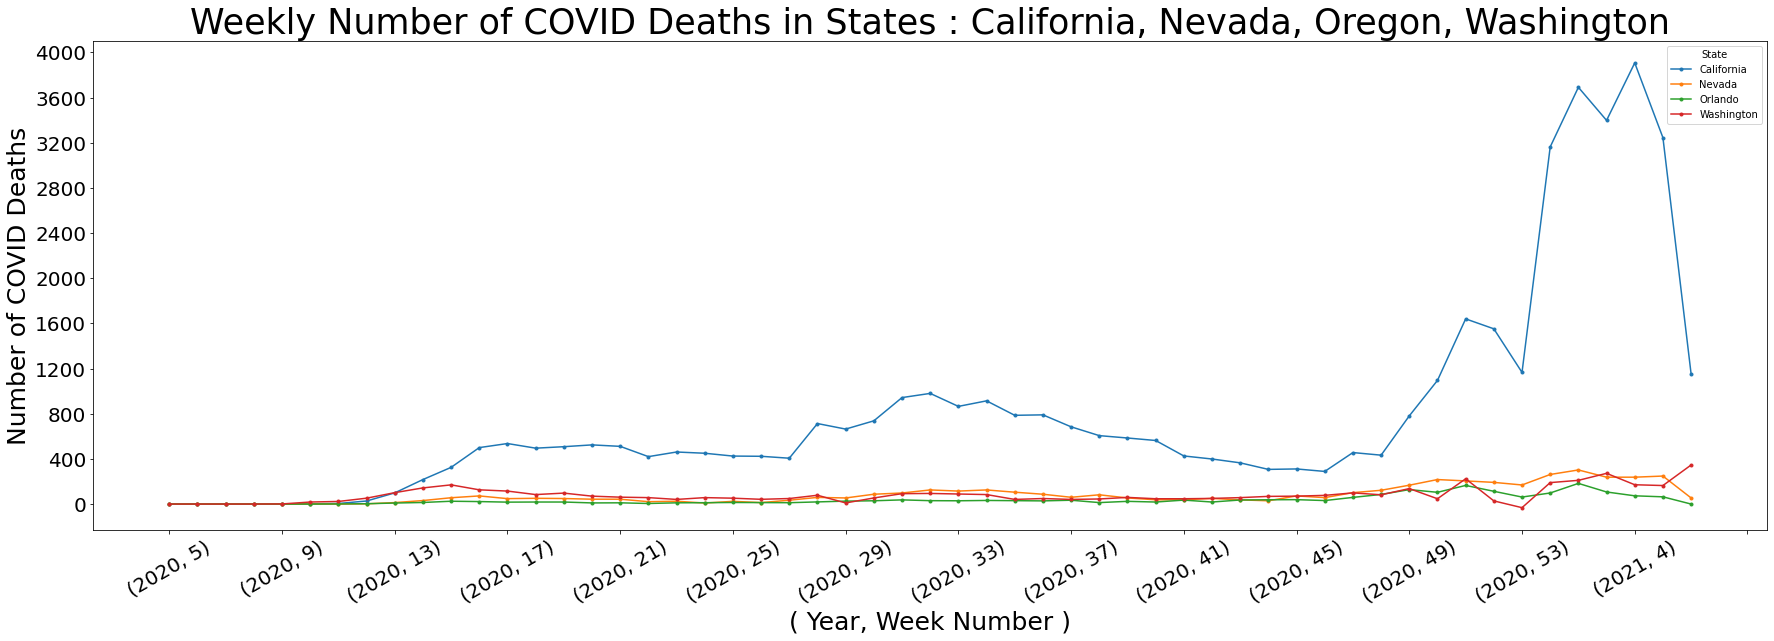

In [8]:
# Weekly plotting of Deaths due to Covid in the 4 states.
plt.rcParams["figure.figsize"] = (30,9)
ax=deaths_plot.plot(marker='.',fontsize=20,xticks=np.arange(0,58,4),rot=30)
ax.set_xlabel('( Year, Week Number )',fontsize=25)
ax.set_ylabel('Number of COVID Deaths',fontsize=25)
ax.set_title('Weekly Number of COVID Deaths in States : California, Nevada, Oregon, Washington',fontsize=35)
ax.yaxis.set_major_locator(tt.MultipleLocator(400))

## **Question 4: How do the deaths and the new cases compare?**

### Answer 4: It is clear that states like Oregon, Nevada and Washington follows almost same trend of weekly deaths due to covid, while California had much higher deaths compared to other 3 states. These states also followed same trend for new weekly cases.
### *   The maximum number of weekly deaths reached to around 400 in states of Oregon, Washington and Nevada, while maximum number of weekly deaths almost reached to 3800 which is almost 10 times compared to other 3 plotted states.
### *   So, from this data, we can say that as the new cases increases deaths also increases. By comparison of maximum data for all the states, it is clear that for Oregon, Nevada and Washington ( New Cases/ Deaths ) is 62.5 while for california this ratio is 76.3. So, this ratio is not much bigger as we compare new cases and deaths data separately.




In [9]:
# Make CountyFIPS column as an index in both datasets cases2 and county so it can be helpful in joining two datasets.
cases2.index=cases2['countyFIPS']
cases2.drop(['countyFIPS'],axis=1,inplace=True)
cases_new2=cases2.diff(axis=1).fillna(0)
county.index=county['countyFIPS']
county.drop(['countyFIPS'],axis=1,inplace=True)

In [10]:
# Join two datasets so that population column can be used to generate new covid cases per 100,000 population in each county per week.
# Then convert index to datetime and segregate year and weekno same as before.
joined=county.join(cases_new2,how='inner').drop(['County Name','State','population'],axis=1).T
joined.index=pd.to_datetime(joined.index)
joined['Year'] = joined.index.year
joined['WeekNo']=joined.index.week
new_joined=joined.groupby([joined['Year'],joined['WeekNo']]).sum().T
new_joined.drop(['Year','WeekNo'],inplace=True)

/Users/whitney/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [11]:
# Remove the rows with population=0 as it will not affect overall result.
# Then merge 2 datatsets on index value.
county_new=county[county['population']!=0]
merg=pd.merge(county_new,new_joined,left_index=True,right_index=True)
merg

/Users/whitney/opt/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,County Name,State,population,"(2020, 5)","(2020, 6)","(2020, 7)","(2020, 8)","(2020, 9)","(2020, 10)","(2020, 11)",...,"(2020, 50)","(2020, 51)","(2020, 52)","(2020, 53)","(2021, 1)","(2021, 2)","(2021, 3)","(2021, 4)","(2021, 5)","(2021, 53)"
countyFIPS,,,,,,,,,,,,,,,,,,,,,
1001,Autauga County,AL,55869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,228.0,508.0,288.0,161.0,574.0,305.0,192.0,293.0,200.0,115.0
1003,Baldwin County,AL,223234,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,761.0,1338.0,998.0,776.0,1263.0,924.0,1005.0,870.0,597.0,463.0
1005,Barbour County,AL,24686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41.0,72.0,70.0,108.0,128.0,71.0,98.0,124.0,57.0,16.0
1007,Bibb County,AL,22394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,105.0,215.0,133.0,88.0,169.0,100.0,72.0,84.0,32.0,48.0
1009,Blount County,AL,57826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,364.0,555.0,247.0,176.0,320.0,238.0,169.0,240.0,202.0,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,Sweetwater County,WY,42343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,339.0,267.0,136.0,112.0,142.0,128.0,121.0,75.0,51.0,54.0
56039,Teton County,WY,23464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,120.0,97.0,78.0,58.0,194.0,332.0,246.0,185.0,122.0,21.0
56041,Uinta County,WY,20226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,109.0,109.0,81.0,61.0,138.0,109.0,83.0,63.0,21.0,12.0


## **Question 5: Compute the number of new covid cases per 100,000 population in each county per week. What are the 20 highest rates achieved. Show the date, county and the rate.**

## Answer 5.1: Here is the new covid cases per 100,000 population in each county per week

In [12]:
# Calculation for new covid cases per 100,000 population in each county per week. It gives rates for each county and for each week.
for i in merg.columns:
  if i!='population' and i!='County Name' and i!='State':
    merg[i]= merg[i]/merg['population']*100000

merg.drop(['population'],axis=1,inplace=True)
merg

,County Name,State,"(2020, 5)","(2020, 6)","(2020, 7)","(2020, 8)","(2020, 9)","(2020, 10)","(2020, 11)","(2020, 12)",...,"(2020, 50)","(2020, 51)","(2020, 52)","(2020, 53)","(2021, 1)","(2021, 2)","(2021, 3)","(2021, 4)","(2021, 5)","(2021, 53)"
countyFIPS,,,,,,,,,,,,,,,,,,,,,
1001,Autauga County,AL,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,408.097514,909.269899,515.491596,288.174122,1027.403390,545.919920,343.661064,524.441103,357.980275,205.838658
1003,Baldwin County,AL,0.0,0.0,0.0,0.0,0.0,0.0,0.44796,0.895921,...,340.897892,599.371064,447.064515,347.617298,565.774031,413.915443,450.200238,389.725579,267.432380,207.405682
1005,Barbour County,AL,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,166.086041,291.663291,283.561533,437.494936,518.512517,287.612412,396.986146,502.309001,230.900105,64.814065
1007,Bibb County,AL,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,468.875592,960.078592,593.909083,392.962401,754.666429,446.548183,321.514691,375.100473,142.895418,214.343128
1009,Blount County,AL,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,629.474631,959.775879,427.143499,304.361360,553.384291,411.579566,292.256079,415.038218,349.323834,181.579220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,Sweetwater County,WY,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,800.604586,630.564674,321.186501,264.506530,335.356493,302.293177,285.761519,177.124908,120.444938,127.529934
56039,Teton County,WY,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,8.523696,...,511.421752,413.399250,332.424139,247.187180,826.798500,1414.933515,1048.414593,788.441868,519.945448,89.498807
56041,Uinta County,WY,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,538.910313,538.910313,400.474637,301.592010,682.290122,538.910313,410.362899,311.480273,103.826758,59.329576


In [13]:
# Set merg dataframe index to [County Name, State]
merg=merg.set_index(['County Name','State'])

In [14]:
# Gives Top 20 Highest Rates for County Names. 
merg.max(axis=1).sort_values(ascending=False).head(20)

County Name       State
Trousdale County  TN       11503.013116
Lafayette County  FL       10009.498931
Forest County     PA        9134.814406
Childress County  TX        8335.614563
Crowley County    CO        7688.500247
Lincoln County    CO        7314.506227
Pershing County   NV        7271.375465
Wayne County      TN        7047.322018
Crockett County   TX        6033.487298
Lee County        AR        5724.285876
Bon Homme County  SD        5549.920301
Crane County      TX        5524.286012
Morgan County     KY        5485.010144
Upton County      TX        5441.618813
Hansford County   TX        5408.408965
Alpine County     CA        5314.437555
Floyd County      TX        5217.086835
Norton County     KS        5204.252938
Coke County       TX        5107.764984
Burleson County   TX        4977.498238
dtype: float64

In [15]:
# Gives Top 20 Highest Rates for ( Year, WeekNo ) Pairs.
merg.max().sort_values(ascending=False).head(20)

(2020, 18)    11503.013116
(2020, 33)    10009.498931
(2021, 3)      9134.814406
(2020, 45)     8335.614563
(2020, 46)     7688.500247
(2020, 49)     7314.506227
(2020, 53)     7271.375465
(2020, 36)     7047.322018
(2020, 52)     6033.487298
(2020, 24)     5724.285876
(2020, 47)     5576.637519
(2020, 44)     5549.920301
(2021, 1)      5485.010144
(2020, 43)     5204.252938
(2021, 5)      4977.498238
(2020, 34)     4973.624717
(2021, 53)     4959.269875
(2020, 20)     4903.078677
(2020, 17)     4729.729730
(2020, 50)     4715.797023
dtype: float64

## Answer 5.2: Below cell gives Top 20 New COVID Cases Highest Rates Achieved...

In [16]:
merg.melt().value.sort_values(ascending=False).head(20)

43358     11503.013116
88328     10009.498931
162512     9134.814406
128240     8335.614563
129079     7688.500247
138529     7314.506227
152575     7271.375465
99920      7047.322018
150249     6033.487298
59847      5724.285876
132221     5576.637519
124903     5549.920301
150248     5524.286012
155038     5485.010144
150427     5441.618813
150294     5408.408965
147861     5314.437555
150273     5217.086835
120352     5204.252938
150237     5107.764984
Name: value, dtype: float64

In [17]:
# Calculation for date, county and the rate of highest 20 rates.
result=pd.DataFrame( data=
    { 'County Name':['Trousdale County','Lafayette County','Forest County','Childress County','Crowley County','Lincoln County','Pershing County',
                'Wayne County','Crockett County','Lee County','Bon Homme County','Crane County','Morgan County','Upton County','Hansford County',
                'Alpine County','Floyd County','Norton County','Coke County','Burleson County'],
     'State':['TN','FL','PA','TX','CO','CO','NV','TN','TX','AR','SD','TX','KY','TX','TX','CA','TX','KS','TX','TX'],
     '(Year, WeekNo)': ['(2020, 18)','(2020, 33)','(2021, 3)','(2020, 45)','(2020, 46)','(2020, 49)','(2020, 53)','(2020, 36)','(2020, 52)','(2020, 24)','(2020, 47)','(2020, 44)','(2021, 1)','(2020, 43)','(2021, 5)','(2020, 34)','(2020, 53)','(2020, 20)','(2020, 17)','(2020, 50)'],
'Rates':[11503.013116,10009.498931,9134.814406,8335.614563,7688.500247,7314.506227,7271.375465,7047.322018,6033.487298,5724.285876,
         5576.637519,5549.920301,5524.286012,5485.010144,5441.618813,5408.408965,5314.437555,5217.086835,5204.252938,5107.764984]})

### Answer 5.3: Gives County Name, State and WeekNo (Date) for Highest 20 rates of new COVID cases. 

In [18]:
result

,County Name,State,"(Year, WeekNo)",Rates
0,Trousdale County,TN,"(2020, 18)",11503.013116
1,Lafayette County,FL,"(2020, 33)",10009.498931
2,Forest County,PA,"(2021, 3)",9134.814406
3,Childress County,TX,"(2020, 45)",8335.614563
4,Crowley County,CO,"(2020, 46)",7688.500247
5,Lincoln County,CO,"(2020, 49)",7314.506227
6,Pershing County,NV,"(2020, 53)",7271.375465
7,Wayne County,TN,"(2020, 36)",7047.322018
8,Crockett County,TX,"(2020, 52)",6033.487298
9,Lee County,AR,"(2020, 24)",5724.285876


In [19]:
# Make CountyFIPS column as an index in dataset deaths2 so it can be helpful in joining two datasets.
deaths2.index=deaths2['countyFIPS']
deaths2.drop(['countyFIPS'],axis=1,inplace=True)
deaths_new2=deaths2.diff(axis=1).fillna(0)

In [20]:
# Join two datasets so that population column can be used to generate covid deaths per 100,000 population in each county per week.
# Then convert index to datetime and segregate year and weekno same as before.
joined2=county.join(deaths_new2,how='inner').drop(['County Name','State','population'],axis=1).T
joined2.index=pd.to_datetime(joined2.index)
joined2['Year'] = joined2.index.year
joined2['WeekNo']=joined2.index.week
new_joined2=joined2.groupby([joined2['Year'],joined2['WeekNo']]).sum().T
new_joined2.drop(['Year','WeekNo'],inplace=True)

/Users/whitney/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [21]:
# Remove the rows with population=0 as it will not affect overall result.
# Then merge 2 datatsets on index value.
merg2=pd.merge(county_new,new_joined2,left_index=True,right_index=True)
merg2

/Users/whitney/opt/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,County Name,State,population,"(2020, 5)","(2020, 6)","(2020, 7)","(2020, 8)","(2020, 9)","(2020, 10)","(2020, 11)",...,"(2020, 50)","(2020, 51)","(2020, 52)","(2020, 53)","(2021, 1)","(2021, 2)","(2021, 3)","(2021, 4)","(2021, 5)","(2021, 53)"
countyFIPS,,,,,,,,,,,,,,,,,,,,,
1001,Autauga County,AL,55869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,3.0,1.0,4.0,1.0,7.0,7.0,8.0,2.0
1003,Baldwin County,AL,223234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,6.0,5.0,9.0,4.0,9.0,7.0,35.0,10.0,8.0
1005,Barbour County,AL,24686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,2.0,1.0,2.0,2.0,5.0,1.0
1007,Bibb County,AL,22394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,4.0,1.0,0.0,1.0,4.0,1.0,0.0
1009,Blount County,AL,57826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,7.0,4.0,5.0,14.0,6.0,3.0,14.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,Sweetwater County,WY,42343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,1.0,8.0,2.0,4.0,2.0,1.0,0.0
56039,Teton County,WY,23464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0
56041,Uinta County,WY,20226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0


## **Question 6: Compute the number of covid deaths per 100,000 population in each county per week. What are the 20 highest rates achieved. Show the date, county and the rate.**

## Answer 6.1: Here is the covid deaths per 100,000 population in each county per week

In [22]:
# Calculation for new covid cases per 100,000 population in each county per week.
for i in merg2.columns:
  if i!='population' and i!='County Name' and i!='State':
    merg2[i]= merg2[i]/merg2['population']*100000

merg2.drop(['population'],axis=1,inplace=True)
merg2

,County Name,State,"(2020, 5)","(2020, 6)","(2020, 7)","(2020, 8)","(2020, 9)","(2020, 10)","(2020, 11)","(2020, 12)",...,"(2020, 50)","(2020, 51)","(2020, 52)","(2020, 53)","(2021, 1)","(2021, 2)","(2021, 3)","(2021, 4)","(2021, 5)","(2021, 53)"
countyFIPS,,,,,,,,,,,,,,,,,,,,,
1001,Autauga County,AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,5.369704,5.369704,1.789901,7.159606,1.789901,12.529310,12.529310,14.319211,3.579803
1003,Baldwin County,AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.343881,2.687763,2.239802,4.031644,1.791842,4.031644,3.135723,15.678615,4.479604,3.583683
1005,Barbour County,AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.050879,8.101758,0.000000,0.000000,8.101758,4.050879,8.101758,8.101758,20.254395,4.050879
1007,Bibb County,AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.465482,13.396445,0.000000,17.861927,4.465482,0.000000,4.465482,17.861927,4.465482,0.000000
1009,Blount County,AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.729326,12.105281,6.917304,8.646630,24.210563,10.375955,5.187978,24.210563,20.751911,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,Sweetwater County,WY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.446662,2.361665,0.000000,2.361665,18.893324,4.723331,9.446662,4.723331,2.361665,0.000000
56039,Teton County,WY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,8.523696,0.000000,0.000000,4.261848,4.261848,4.261848,0.000000
56041,Uinta County,WY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.888263,0.000000,0.000000,0.000000,4.944131,4.944131,14.832394,0.000000,0.000000,0.000000


In [23]:
# Set merg dataframe index to [County Name, State]
merg2=merg2.set_index(['County Name','State'])

In [24]:
# Gives Top 20 Highest Rates for County Names. 
merg2.max(axis=1).sort_values(ascending=False).head(20)

County Name           State
O'Brien County        IA       414.455028
Gove County           KS       341.426404
Rush County           KS       329.380764
Borden County         TX       305.810398
Jerauld County        SD       298.062593
Foster County         ND       280.373832
Renville County       ND       257.842716
Kenedy County         TX       247.524752
Golden Valley County  MT       243.605359
Hamlin County         SD       243.348475
Sterling County       TX       232.378002
Hodgeman County       KS       222.965440
Mitchell County       KS       217.427663
Wayne County          IA       217.357553
Decatur County        KS       212.239123
Perkins County        SD       209.424084
                      NE       207.540643
Wibaux County         MT       206.398349
Petroleum County      MT       205.338809
McPherson County      NE       202.429150
dtype: float64

In [25]:
#Gives Top 20 Highest Rates for ( Year, WeekNo ) Pairs.
merg2.max().sort_values(ascending=False).head(20)

(2021, 4)     414.455028
(2020, 42)    341.426404
(2021, 5)     305.810398
(2020, 43)    298.062593
(2020, 48)    280.373832
(2020, 45)    265.553869
(2020, 49)    257.842716
(2020, 31)    247.524752
(2020, 39)    247.524752
(2021, 3)     243.605359
(2021, 1)     232.378002
(2021, 2)     217.427663
(2020, 50)    217.357553
(2020, 53)    212.239123
(2020, 51)    209.424084
(2020, 32)    207.540643
(2020, 47)    206.398349
(2020, 21)    201.016909
(2020, 44)    162.162162
(2020, 52)    160.513644
dtype: float64

## Answer 6.2: Below cell gives Top 20 Highest COVID Death Rates Achieved...

In [26]:
merg2.melt().value.sort_values(ascending=False).head(20)

164243    414.455028
117173    341.426404
164354    329.380764
169065    305.810398
121793    298.062593
137111    280.373832
126599    265.553869
140275    257.842716
84345     247.524752
109481    247.524752
161858    243.605359
140637    243.348475
156696    232.378002
139177    222.965440
158049    217.427663
142271    217.357553
151723    212.239123
146946    209.424084
86555     207.540643
133616    206.398349
Name: value, dtype: float64

In [27]:
# Calculation for date, county and the rate of highest 20 rates.
result2=pd.DataFrame( data=
    { 'County Name':['O''Brien County','Gove County','Rush County','Borden County','Jerauld County','Foster County','Renville County','Kenedy County',
                     'Golden Valley County','Hamlin County','Sterling County','Hodgeman County','Mitchell County','Wayne County','Decatur County','Perkins County',
                     'Perkins County','Wibaux County','Petroleum County','McPherson County'],
     'State':['IA','KS','KS','TX','SD','ND','ND','TX','MT','SD','TX','KS','KS','IA','KS','SD','NE','MT','MT','NE'],
     '(Year, WeekNo)': ['(2021, 4)','(2020, 42)','(2021, 5)','(2020, 43)','(2020, 48)','(2020, 45)','(2020, 49)','(2020, 31)','(2020, 39)','(2021, 3)','(2021, 1)','(2021, 2)','(2020, 50)','(2020, 53)','(2020, 51)','(2020, 32)','(2020, 47)','(2020, 21)','(2020, 44)','(2020, 52)'],
'Rates':[414.455028,341.426404,329.380764,305.810398,298.062593,280.373832,265.553869,257.842716,247.524752,247.524752,243.605359,243.348475,232.378002,222.965440,217.427663,217.357553,212.239123,209.424084,207.540643,206.398349]})

### Answer 6.3: Gives County Name, State and WeekNo (Date) for Highest 20 rates of COVID deaths. 

In [28]:
result2

,County Name,State,"(Year, WeekNo)",Rates
0,OBrien County,IA,"(2021, 4)",414.455028
1,Gove County,KS,"(2020, 42)",341.426404
2,Rush County,KS,"(2021, 5)",329.380764
3,Borden County,TX,"(2020, 43)",305.810398
4,Jerauld County,SD,"(2020, 48)",298.062593
5,Foster County,ND,"(2020, 45)",280.373832
6,Renville County,ND,"(2020, 49)",265.553869
7,Kenedy County,TX,"(2020, 31)",257.842716
8,Golden Valley County,MT,"(2020, 39)",247.524752
9,Hamlin County,SD,"(2021, 3)",247.524752


## **Question 7: What is the relation between the results in #5 and #6.**

## Answer 7: Results of #5 states that top 20 highest rates are ranging from 11500 to 5100. Also, there are almost more than 30% counties from Texas (TX) state in top 20 highest counties.
## *   Results of #6 states that top 20 highest rates are ranging from 415 to 207. Also, there are many counties from Kansas (KS) and Montana (MT) states in top 20 highest deaths.
## *   From both dataframes we can say that in the last 3 months of 2020 & in January, 2021 new weekly COVID cases and deaths both have increased much. 









## **Question 8: Find the week that each county achieved their highest rate of new covid cases per 100,000 population. If a county reach the peak multiple times pick the earliest one. Plot via a bar chart the number of counties that reached their peak each week. What does the plot indicate about the pandemic?**
## Answer 8: Here is the (Year, WeekNo) pairs for each county which achieved their highest rate of new covid cases per 100,000 population.

In [29]:
plot8=pd.DataFrame(merg.idxmax(axis=1))
plot8.rename(columns={0:'(Year, WeekNo)'},inplace=True)
plot8

,,"(Year, WeekNo)"
County Name,State,
Autauga County,AL,"(2021, 1)"
Baldwin County,AL,"(2020, 51)"
Barbour County,AL,"(2021, 1)"
Bibb County,AL,"(2020, 51)"
Blount County,AL,"(2020, 51)"
...,...,...
Sweetwater County,WY,"(2020, 48)"
Teton County,WY,"(2021, 2)"
Uinta County,WY,"(2020, 47)"


In [30]:
# Here is the dataframe that suggests No. of Counties That reached their peaks in particular week.
final=pd.DataFrame(plot8.groupby(['(Year, WeekNo)']).size())
final.rename(columns={0:'No. of Counties That reached their peaks in the week'},inplace=True)
final

,No. of Counties That reached their peaks in the week
"(Year, WeekNo)",
"(2020, 5)",2
"(2020, 13)",1
"(2020, 14)",4
"(2020, 15)",7
"(2020, 16)",3
"(2020, 17)",6
"(2020, 18)",7
"(2020, 19)",5
"(2020, 20)",6


## Answer 8.1: Here is the bar chart of the number of counties that reached their peak each week.

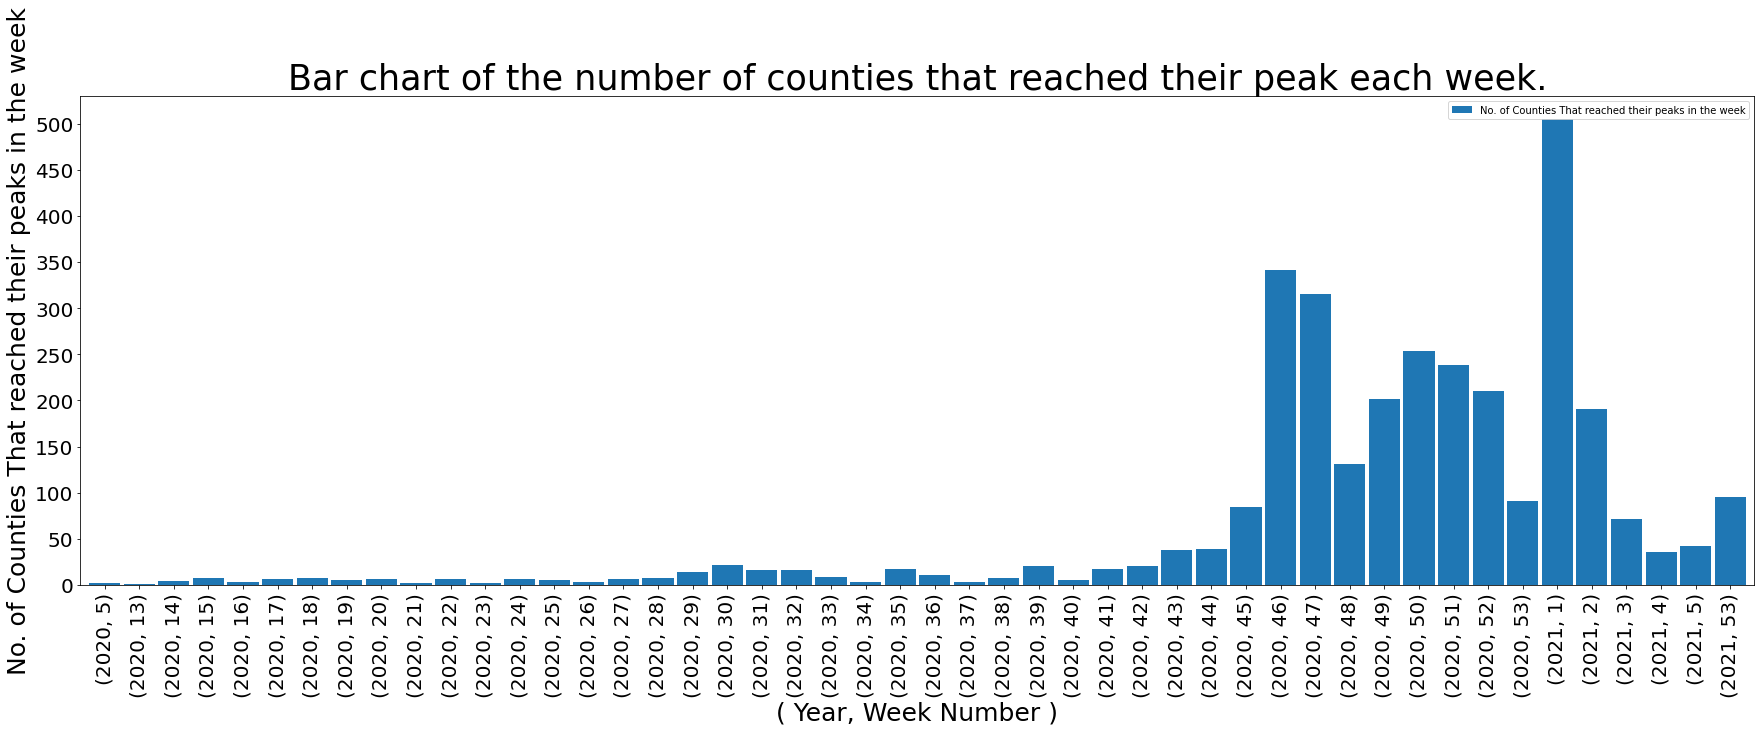

In [31]:
# Plotting of bar chart of the number of counties that reached their peak each week.
plt.rcParams["figure.figsize"] = (30,9)
ax=final.plot(kind='bar',fontsize=20,width=0.9,)
ax.set_xlabel('( Year, Week Number )',fontsize=25)
ax.set_ylabel('No. of Counties That reached their peaks in the week',fontsize=25)
ax.set_title('Bar chart of the number of counties that reached their peak each week.',fontsize=35)
ax.yaxis.set_major_locator(tt.MultipleLocator(50))

## Answer 8.2: The plot indicates that (2021, 1) means 4 Jan, 2021 to 10 Jan, 2021 is the week on which most counties have reached their peaks.
## *   Also, from bar plot we can say that (2020, 46) to (2021, 2) means 9 Nov, 2020 to 17 Jan, 2021 pandemic affects most counties as most counties' peaks are in this range.





## **Question 9: Compute the total number of covid cases in each county and the number of covid deaths. Compute the percent of the population in each county that is still alive and has had covid. Show the top 20 rates. Is any county getting close to herd immunity, that is 70% or more people immune?**

In [32]:
# Use cases2 dataset and then select column 2021-02-07 and then rename it to Total Cases
total_cases=cases2.loc[:, cases2.columns == '2021-02-07']
total_cases.rename(columns={'2021-02-07':'Total Cases'},inplace=True)

#Use deaths2 dataset and then select column 2021-02-07 and then rename it to Total Deaths
total_deaths=deaths2.loc[:, deaths2.columns == '2021-02-07']
total_deaths.rename(columns={'2021-02-07':'Total Deaths'},inplace=True)

/Users/whitney/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Answer 9.1: Here is the total number of covid cases in each county and the number of covid deaths.

In [33]:
# Join 3 datasets total_cases, total_deaths & county. 
merger=total_cases.join(total_deaths)
total=county_new.join(merger)
total

,County Name,State,population,Total Cases,Total Deaths
countyFIPS,,,,,
1001,Autauga County,AL,55869,5869,77
1003,Baldwin County,AL,223234,18723,234
1005,Barbour County,AL,24686,2008,45
1007,Bibb County,AL,22394,2339,53
1009,Blount County,AL,57826,5915,112
...,...,...,...,...,...
56037,Sweetwater County,WY,42343,3537,33
56039,Teton County,WY,23464,3238,7
56041,Uinta County,WY,20226,1984,12


### Answer 9.2: Here is the percent of the population in each county that is still alive and has had covid. It shows top 20 COVID-Immune Rates.

In [34]:
total['COVID-Immune Rates']=(total['Total Cases']-total['Total Deaths'])*100/total['population']
total.sort_values('COVID-Immune Rates',ascending=False).head(20)

,County Name,State,population,Total Cases,Total Deaths,COVID-Immune Rates
countyFIPS,,,,,,
8025,Crowley County,CO,6061,1885,14,30.869493
8011,Bent County,CO,5577,1329,20,23.471400
5079,Lincoln County,AR,13024,3090,42,23.402948
47095,Lake County,TN,7016,1658,24,23.289624
46041,Dewey County,SD,5892,1390,21,23.234895
13053,Chattahoochee County,GA,10907,2486,3,22.765197
20137,Norton County,KS,5361,1203,27,21.936206
46009,Bon Homme County,SD,6901,1500,25,21.373714
46017,Buffalo County,SD,1962,420,13,20.744139


## **Is any county getting close to herd immunity, that is 70% or more people immune?**
## Answer 9.3: No, there is no county that has reached close to herd immunity. Crowley County, Colarado (CO) has highest immunity of 30.86% of population.

## **Question 10: Produce a Violin and box plots of all the values computed in #8. What do the plots show about the pandemic in the USA?**
## Violin Plot

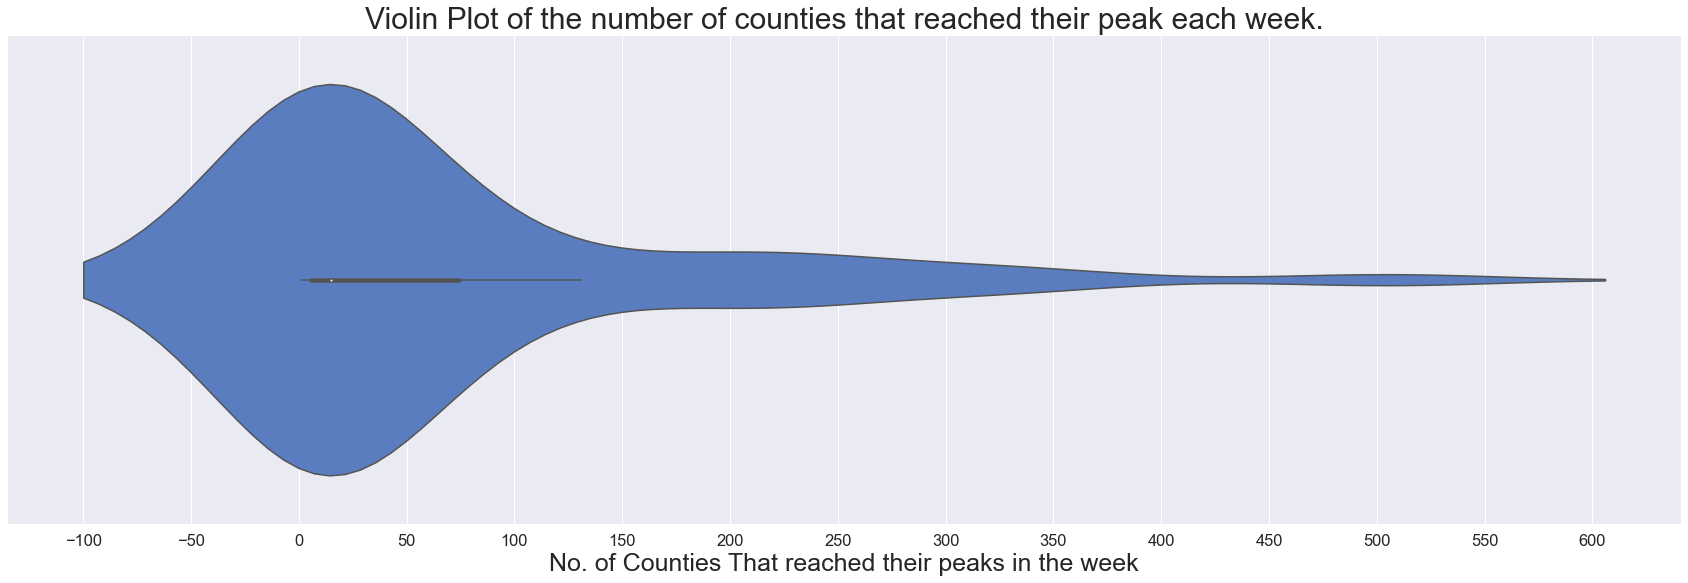

In [35]:
sns.set(font_scale = 1.5)
ax=sns.violinplot(data=final,x='No. of Counties That reached their peaks in the week',palette='muted')
ax.set_xlabel('No. of Counties That reached their peaks in the week',fontsize=25)
ax.set_title('Violin Plot of the number of counties that reached their peak each week.',fontsize=30)
ax.xaxis.set_major_locator(tt.MultipleLocator(50))

## Box Plot

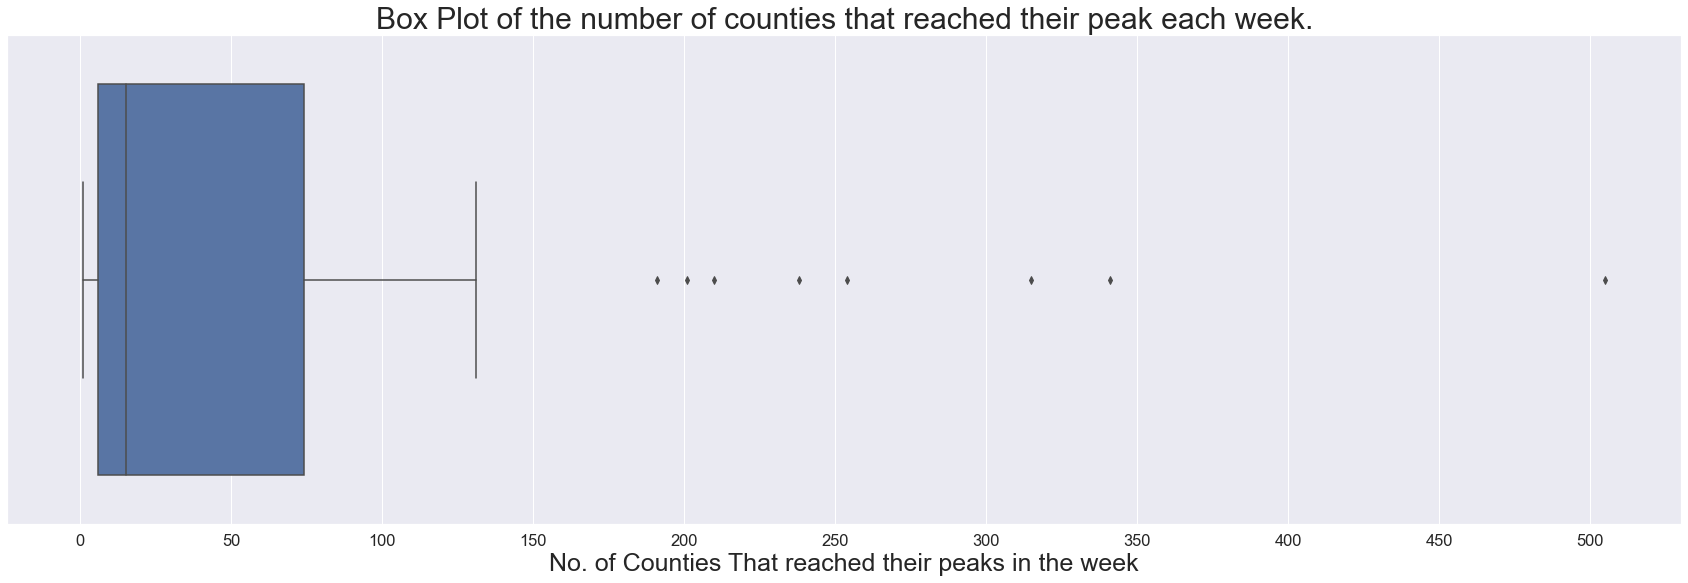

In [36]:
ax=sns.boxplot(data=final,x='No. of Counties That reached their peaks in the week')
ax.set_xlabel('No. of Counties That reached their peaks in the week',fontsize=25)
ax.set_title('Box Plot of the number of counties that reached their peak each week.',fontsize=30)
ax.xaxis.set_major_locator(tt.MultipleLocator(50))

## Violin plot shows that median of counties that reached their peaks is around 15. Also, we can say that each week averages around 1-80 counties as in that area violin plot is more broad which shows higher probability.
## Box Plot also shows that median of counties that reached their peaks is around 15 and it is clear that Interquartile Range (IR) is around 75 which shows average number of counties that reached their peaks in every weak.